# Como lidar com dados de séries temporais com facilidade

Inicializando pacotes e lendo arquivos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [2]:
air_quality.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

# Usando propriedades de data e hora do pandas

Quero trabalhar com as datas na coluna datetimecomo objetos de data e hora em vez de texto simples  

Inicialmente, os valores em datetime são strings de caracteres e não fornecem nenhuma operação de data e hora.  
Por exemplo, extrair o ano, o dia da semana, etc.  
Ao aplicar a função *to_datetime*, o pandas interpreta as strings e as converte em objetos de data e hora (ie).  
No pandas, chamamos esses objetos de data e hora, semelhantes aos da biblioteca padrão, de  

* .datetime64[ns, UTC] 
* datetime.datetimepandas.Timestamp

In [3]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

Como muitos conjuntos de dados contêm informações de data e hora em uma das colunas,  
a função de entrada do pandas é semelhante pandas.read_csv() e pandas.read_json() 
pode fazer a transformação em datas ao ler os dados usando o parâmetro *parse_dates* com uma lista das colunas a serem lidas como Timestamp:

```
pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=["datetime"])
```

Por que esses pandas.Timestampobjetos são úteis? Vamos ilustrar o valor agregado com alguns exemplos.

Qual é a data de início e término do conjunto de dados de séries temporais com o qual estamos trabalhando?

Usar pandas.Timestampfor datetimes nos permite calcular com informações de data e torná-las comparáveis.  
Portanto, podemos usar isso para obter a duração da nossa série temporal:

In [4]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

In [5]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

O resultado é um pandas.Timedeltaobjeto, semelhante ao datetime.timedelta da biblioteca padrão do Python e que define uma duração de tempo.

Quero adicionar uma nova coluna contendo DataFrameapenas o mês da medição

Ao usar o objeto Timestamp para datas, o pandas fornece muitas propriedades relacionadas ao tempo.  
Por exemplo month, mas também year, quarter,… Todas essas propriedades são acessíveis.

In [6]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


Qual é a média da concentração para cada dia da semana para cada um dos locais de medição?

In [7]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Lembra-se do padrão dividir-aplicar-combinar fornecido groupbyno tutorial sobre cálculo estatístico?  
Aqui, queremos calcular uma determinada estatística (por exemplo, média) para cada dia da semana e para cada local de medição.  
Para agrupar por dias da semana, usamos a propriedade datetime weekday(com segunda-feira = 0 e domingo = 6) do pandas Timestamp,  
que também pode ser acessada pelo dtacessador. 

O agrupamento por locais e dias da semana pode ser feito para dividir o cálculo da média em cada uma dessas combinações.

Trace o típico NO2 padrão ao longo do dia da nossa série temporal de todas as estações juntas.  
Em outras palavras, qual é o valor médio para cada hora do dia?

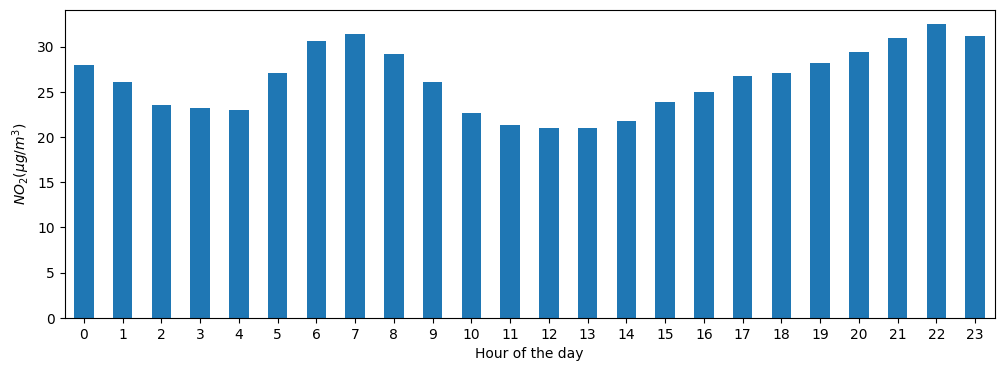

In [8]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=axs)

# custom x label using Matplotlib
plt.xlabel("Hour of the day");
plt.ylabel("$NO_2 (µg/m^3)$");


Semelhante ao caso anterior, queremos calcular uma determinada estatística.  
Por exemplo, média para cada hora do dia e podemos usar a abordagem dividir-aplicar-combinar novamente.  
Para este caso, usamos a propriedade datetime hour do pandas Timestamp, que também pode ser acessada pelo dtacessador.

# Data e hora como índice 

No tutorial sobre remodelagem, pivot() foi apresentado como remodelar a tabela de dados com cada um dos locais de medições como uma coluna separada:

In [9]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


Trabalhar com um índice de data e hora (ie DatetimeIndex) fornece funcionalidades poderosas.  
Por exemplo, não precisamos do dtacessador para obter as propriedades da série temporal,  
mas temos essas propriedades disponíveis diretamente no índice:

Caso o Pylance, retorne o erro index.year desconhecido, é porque o tipo do indece não foi reconhecido pela extenção.  
Apesar de funcionar, o vscode só vai parar de dar erro se deixar explicito o tipo do indes.  
Usar o comando *pd.to_datetime(dataframe.index)*

In [10]:
no_2.index = pd.to_datetime(no_2.index)
no_2.index.year, no_2.index.weekday

(Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
        ...
        2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
       dtype='int32', name='datetime', length=1033),
 Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        ...
        3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
       dtype='int32', name='datetime', length=1033))

Outras vantagens são a subdivisão conveniente do período de tempo ou a escala de tempo adaptada nos gráficos.  
Vamos aplicar isso aos nossos dados.

Crie um gráfico NO2 do valores nas diferentes estações do dia 20 de maio até o final do dia 21 de maio.  

Ao fornecer uma string que analisa uma data e hora , um subconjunto específico de dados pode ser selecionado em um DatetimeIndex.

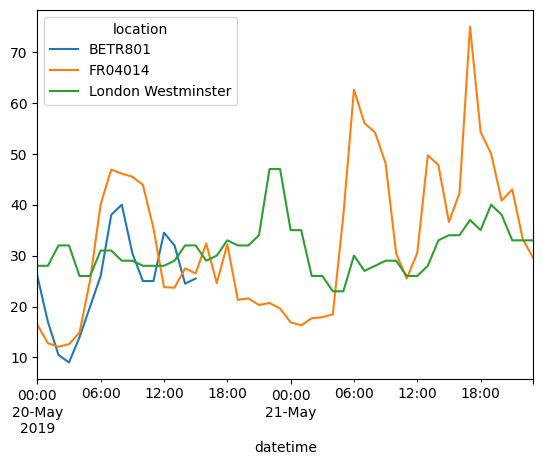

In [11]:
no_2["2019-05-20":"2019-05-21"].plot();

# Reamostrar uma série temporal para outra frequência

Agregue os valores atuais da série temporal horária ao valor máximo mensal em cada uma das estações.

Um método muito poderoso em dados de séries temporais com um índice de data e hora é *resample()*.  
Tem a capacidade de criar series temporais para outra frequência (por exemplo, convertendo dados de segundos em dados de 5 minutos).

In [12]:
monthly_max = no_2.resample("ME").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


O método *resample()*, é semelhante a uma operação *groupby*,  

* ele fornece um agrupamento baseado no tempo, usando uma string (por exemplo M, 5H, ...)  que define a frequência alvo
* requer uma função de agregação como mean, max,…

Quando definida, a frequência da série temporal é fornecida pelo atributo *freq*:

Caso o Pylance, retorne o erro index.year desconhecido, é porque o tipo do indece não foi reconhecido pela extenção.  
Apesar de funcionar, o vscode só vai parar de dar erro se deixar explicito o tipo do indes.  
Usar o comando *pd.to_datetime(dataframe.index)*

In [13]:
monthly_max.index = pd.to_datetime(monthly_max.index)
monthly_max.index.freq

<MonthEnd>

Faça um gráfico da média diária valor NO2 em cada uma das estações.

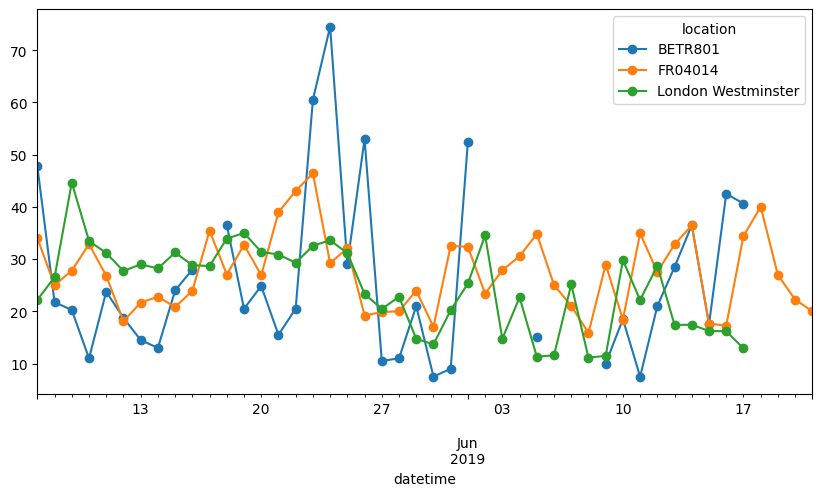

In [14]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5));

**LEMBRAR**

* Sequências de caracteres de data válidas podem ser convertidas em objetos datetime usando to_datetimeuma função ou como parte de funções de leitura.
* Objetos de data e hora no pandas suportam cálculos, operações lógicas e propriedades convenientes relacionadas a datas usando o dt acessador.
* O DatetimeIndex contém essas propriedades relacionadas à data e oferece suporte ao fatiamento conveniente.
* *Resample* é um método poderoso para alterar a frequência de uma série temporal.